In [54]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

# Обработка тренеровочных данных

Этот процесс является очень важной частью перед созданием самой модели нейронной сети. Нам в данных нужно убрать все пропуски, удалить ненужные данные, а также разметить данные на тренировочные и тестовые, если, конечено, это надо.

In [55]:
data = pd.read_csv("train.csv")
data = data.drop(890)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
data = data.drop(columns=['Name', 'PassengerId', 'Ticket', 'Cabin'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [57]:
train_labels = data['Survived']
data = data.drop(columns='Survived')
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [58]:
data.Age.describe()

count    713.000000
mean      29.695891
std       14.536439
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [59]:
fill_value_age = np.mean(data["Age"])
data["Age"] = data["Age"].fillna(fill_value_age)

data["Age"].describe()

count    890.000000
mean      29.695891
std       13.009097
min        0.420000
25%       22.000000
50%       29.695891
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [60]:
data["Embarked"].value_counts()

S    644
C    168
Q     76
Name: Embarked, dtype: int64

In [61]:
data["Embarked"] = data['Embarked'].fillna('S')

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    890 non-null    int64  
 1   Sex       890 non-null    object 
 2   Age       890 non-null    float64
 3   SibSp     890 non-null    int64  
 4   Parch     890 non-null    int64  
 5   Fare      890 non-null    float64
 6   Embarked  890 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.8+ KB


## Кодирование в числовой тип данных

Так нерйронной сети будет легко обрабатывать данные

In [63]:
sex_dict = {
    "male": 0,
    "female": 1,
}

data["Sex"] = list(map(lambda x: sex_dict[x], data['Sex']))

data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,3,1,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,3,0,35.0,0,0,8.0500,S


In [64]:
embarked_dict = {
    "S": 0,
    "C": 1,
    "Q": 2,
}

data["Embarked"] = list(map(lambda x: embarked_dict[x], data["Embarked"]))
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


# Построение модели

In [84]:
def build_model():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(7,)))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy', #binary_crossentropy
                 metrics=['accuracy']) #accuracy
    
    return model

In [66]:
def data_to_array(data):
    res = []
    for i in range(len(data)):
        res.append(list(data.iloc[i]))
    return np.array(res)

In [67]:
train_data = data_to_array(data)

In [88]:
k = 5
epochs = 250
chank = len(train_data) // k
all_scores = []

print("Start to work:")
for i in range(k):
    print('Stage:', i+1)
    start = i * chank
    end = (i+1) * chank
    val_x = train_data[start:end]
    val_y = train_labels[start:end]
    
    x = np.concatenate([train_data[:start], train_data[end:]], axis=0)
    y = np.concatenate([train_labels[:start], train_labels[end:]], axis=0)
    
    model = build_model()
    
    history = model.fit(x,
                        y,
                        batch_size=8,
                        epochs=epochs,
                        verbose=0,
                        validation_data=[val_x, val_y])
    scores = history.history['val_accuracy']
    all_scores.append(scores)
    
print("Done! ----------|")

Start to work:
Stage: 1
Stage: 2
Stage: 3
Stage: 4
Stage: 5
Done! ----------|


In [89]:
average_mae_history = [np.mean([x[i] for x in all_scores]) for i in range(epochs)]

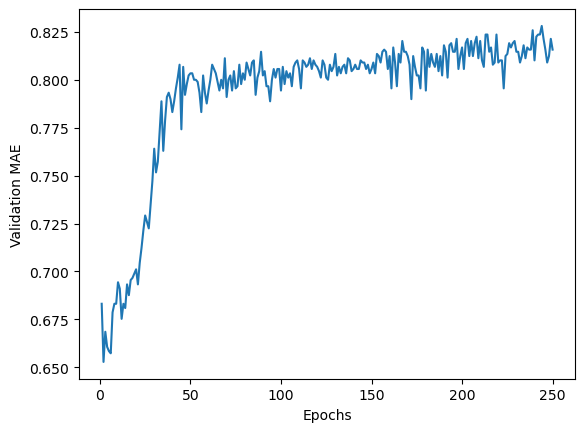

In [90]:
plot.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plot.xlabel('Epochs')
plot.ylabel('Validation MAE')
plot.show()

# Создание простой модели нейроной сети

In [91]:
# val_x = train_data[:89]
# val_y = train_labels[:89]

x = train_data[:]
y = train_labels[:]

epochs = 250
model = build_model()

print("Start learning! ----------|")
history = model.fit(x,
                    y,
                    batch_size=8,
                    epochs=epochs,
                    verbose=0,
                    #validation_data=[val_x, val_y]
                   )

print("Done learning!  ----------|")

Start learning! ----------|
Done learning!  ----------|


In [93]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [94]:
history.history['accuracy'][-1]

0.800000011920929

# Обработка тестовых данных

In [95]:
data_test = pd.read_csv("test.csv")
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [96]:
data_test = data_test.drop(columns=['Name', 'Ticket', 'Cabin'])

res_file = pd.DataFrame({'PassengerId':data_test['PassengerId'], "Survived": list(range(418))})
data_test = data_test.drop(columns=['PassengerId'])
res_file.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,2
3,895,3
4,896,4


In [97]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [98]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [99]:
code_dict = {
    "male": 0,
    "female": 1,
    "S": 0,
    "C": 1,
    "Q": 2,
}

fill_age_val = np.mean(data_test["Age"])
data_test["Age"] = data_test["Age"].fillna(fill_age_val)

data_test["Sex"] = list(map(lambda x: code_dict[x], data_test["Sex"]))
data_test["Embarked"] = list(map(lambda x: code_dict[x], data_test["Embarked"]))

fill_fare_val = np.mean(data_test["Fare"])
data_test["Fare"] = data_test["Fare"].fillna(fill_age_val)

In [100]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


# Результаты предсказании

In [101]:
test_data = data_to_array(data_test)

answers = model.predict(test_data)

14/14 [==============================] - 0s 1ms/step


In [102]:
def round_array(array):
    return np.reshape(np.round(array).astype(int), (418, ))

In [103]:
answers = round_array(answers)

In [104]:
answers

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Сохранение результатов в определеный формат DataFrame'а

In [105]:
res_file['Survived'] = answers

In [107]:
res_file.to_csv("predict_titanic.csv", index=False)